## House Price Prediction 

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [5]:
from xgboost import XGBRegressor

Importing the boston house price dataset.

In [7]:
df = sklearn.datasets.load_boston()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [12]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [13]:
#loading the dataset into a pandas dataframe
house_price = pd.DataFrame(df.data, columns = df.feature_names )

In [14]:
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#adding the target column to the dataframe
house_price['price'] = df.target

In [16]:
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
#checking the number of rows and columns in the df
house_price.shape

(506, 14)

In [19]:
#checking for missing values
house_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

No missing values

In [21]:
#getting statistical measures of the data
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between the various features in the dataset.

In [23]:
correl = house_price.corr()

<AxesSubplot:>

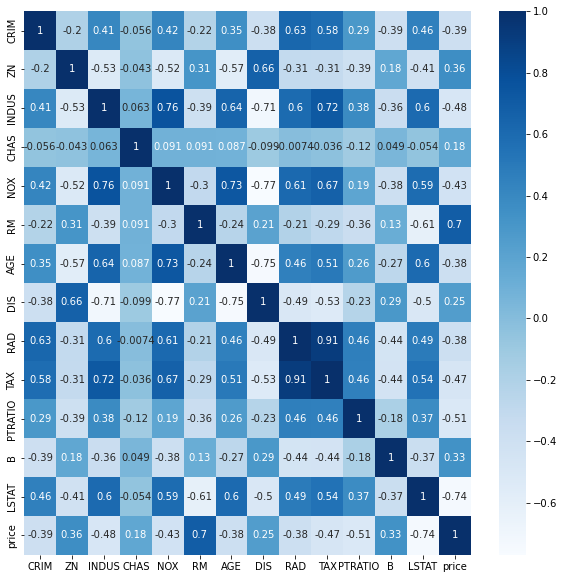

In [25]:
#constructing a heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correl,cmap = 'Blues', annot = True)

Splitting the data and the target

In [26]:
X = house_price.drop('price',axis = 1)
y = house_price.price

In [27]:
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Splitting the data into training data and test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state = 104)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model training 

In [48]:
#xgboost regressor 
#loading the model
model = XGBRegressor()

In [49]:
#training the model
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation

In [50]:
#prediction on training data
y_hat_train = model.predict(X_train)

In [51]:
print(y_hat_train)

[14.503741  16.121878  23.151323  20.599306  20.201136  12.106118
 19.598545  16.600441  17.988794  11.994497  20.097834  19.357859
 15.615374  28.523214  19.045721  18.925894  25.036062  24.094744
  8.27724   49.99941   13.070226  17.211567  24.480154  18.703339
 21.22856    8.808985  16.585964  16.244104  15.389395  10.212089
 24.714546  23.308867  37.606888  31.52663   22.170547  19.810478
 15.599176  14.598459  13.511942  20.720076  22.176708  23.765373
 14.287224  29.856113  20.489767  11.693904  49.99214   16.726643
 23.407587  10.3932085 15.603357  26.227467  49.998806  14.393637
 14.526833  18.71209   24.970322  22.878832  24.807926  33.303856
 48.518578  18.603336  25.028925  49.987885  30.790134  21.778925
 22.013937  19.793526  28.61687   33.178738  21.186453  24.294027
 17.207296  22.468178  18.41836   22.607288  14.590784  22.600708
 22.837536  22.984646  26.400284   4.997382  28.190603  35.99633
 22.695652  12.253376  14.115123  18.897308  18.599205  21.09709
 24.611595  

In [52]:
#using the R-Squared error
score1  = metrics.r2_score(Y_train, y_hat_train)

#mean absolute error
score2 = metrics.mean_absolute_error(Y_train,y_hat_train)

In [53]:
print('R Squared Error: ',score1)
print('Mean Absolute Error: ',score2)

R Squared Error:  0.9999960110242149
Mean Absolute Error:  0.012898836041441127


Visualizing the actual prices and the predicted prices

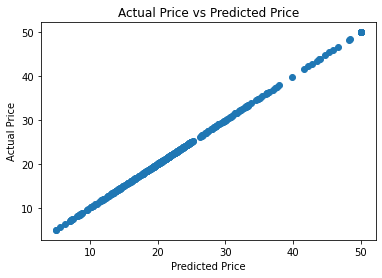

In [56]:
plt.scatter(Y_train,y_hat_train)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Error value for test data

In [40]:
y_hat_test = model.predict(X_test)

In [41]:
score1  = metrics.r2_score(Y_test, y_hat_test)

#mean absolute error
score2 = metrics.mean_absolute_error(Y_test,y_hat_test)

In [43]:
print('R Squared Error for test data : ',score1)
print('Mean Absolute Error for test data : ',score2)

R Squared Error for test data :  0.8541291782677055
Mean Absolute Error for test data :  2.2177257537841792
